<a href="https://colab.research.google.com/github/Mason1217/PyTorch-Practice/blob/master/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [8]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [9]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

https://builtin.com/machine-learning/computer-vision

* OCR (Optical Character Recognition), e.g. Google translation
* Object recognition in transportation industry
* Medical industry

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

https://www.ibm.com/think/topics/overfitting

When model learned "noise" in training data, may be too close to training data, and performing badly in test data or unseen data in the future.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Early stopping
* Give model more "clean" data when training
* Regularization (filtering good features)

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [10]:
import torchvision
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=False
)

image, label = next(iter(train_data))
class_names = train_data.classes
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
print(f"Class names:\n{class_names}")

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.31MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Image shape: torch.Size([1, 28, 28])
Label: 9
Class names:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 6. Visualize at least 5 different samples of the MNIST training dataset.

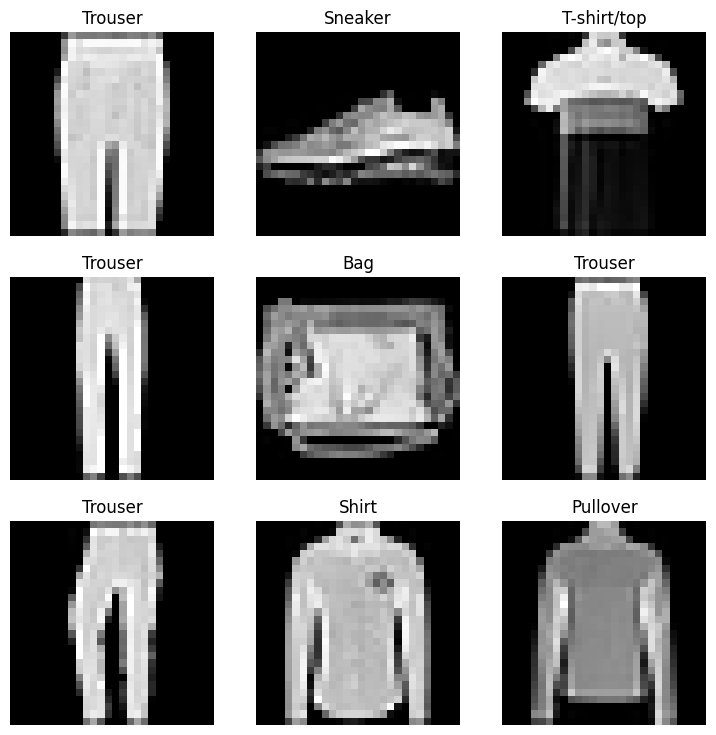

In [11]:
import torch
import random
from matplotlib import pyplot as plt

torch.manual_seed(42)
nrows, ncols = 3, 3

fig = plt.figure(figsize=(9, 9))
for i in range(1, nrows * ncols + 1):
    random_idx = random.randint(0, len(train_data))
    image, label = train_data[random_idx]
    plt.subplot(nrows, ncols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [27]:
import torch
from torch import nn

torch.manual_seed(42)

class TinyVGG(nn.Module):
    def __init__(
            self,
            input_shape: int,
            output_shape: int,
            hidden_units: int = 8,
    ):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3)
        )
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )
    def forward(self, x):
        x = self.cnn_block_1(x)
        print(f"Shape of x after cnn_1: {x.shape}")
        x = self.cnn_block_2(x)
        print(f"Shape of x after cnn_2: {x.shape}")
        x = self.classifier(x)
        return x

model_0 = TinyVGG(
    input_shape=1,
    output_shape=len(class_names)
)

In [28]:
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch}")
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    break

y_logits = model_0(X)
print(f"Shape of y_logits: {y_logits.shape}")

Batch: 0
Shape of X: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32])
Shape of x after cnn_1: torch.Size([32, 8, 8, 8])
Shape of x after cnn_2: torch.Size([32, 8, 1, 1])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x8 and 392x10)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
def train_step(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        optimizer: torch.optim.Optimizer,
        device: torch.device = device
):
    model.train_mode()
    model.to(device)
    loss = 0
    acc = 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_logits = model(X)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?